# Exploratory Data Analysis (EDA)

In [149]:
# Importing Libraries and datasets
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("../dataset/raw/train.csv")
test_df = pd.read_csv("../dataset/raw/test.csv")

Text(0.5, 1.0, 'Transported Feature Distribution')

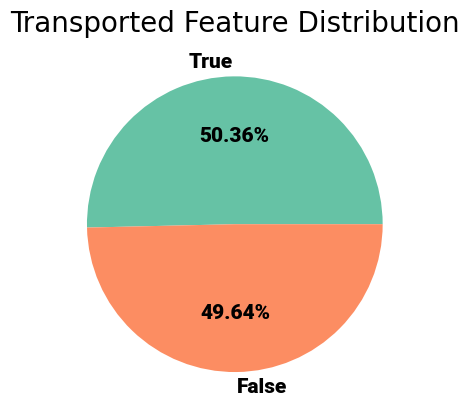

In [150]:
# Visualizing feature "Transported"
plt.pie(train_df["Transported"].value_counts(), labels=["True", "False"], autopct="%1.2f%%", textprops={"fontsize": 15, "fontweight": "black", "fontname": "Roboto"}, colors=sns.color_palette("Set2", 2,))
plt.title("Transported Feature Distribution", fontdict={"fontsize": 20})

### ⚠ Observations
 We can observe that our Transported Feature is highly balanced, so we don't have to use techniques like under_sampling or over_sampling.